# Battle of Neighborhoods
### Seattle, Washington 


##### Project Description:

Usually people tend to explore the places before moving to a new country, state, city or place for their work or to start a new life and that involves so many factors including neighborhood analysis. That calls for a search algorithm that usually returns the requested features such as population rate, median house price, school ratings, crime rates, weather conditions, recreational facilities etc. It’d be nice to have a hassle-free application that could spit out an extensive analysis of all these features for a neighborhood or a comparative analysis between neighborhoods with just sending out the names of the neighborhoods 

This Project takes this requirement as its main idea to help the stake holders to achieve the desired results, so as to help them spend their time and money in some other productive means rather keep them trapped in an infinite loop of extensive search engines.

This Project would help the stakeholders take a better decision on choosing the best neighborhood out of many neighborhoods to build/buy their houses in Seattle city based on the distribution of various facilities in and around that neighborhood. As an example, this project would compare 2 randomly picked neighborhoods and analyses the top 10 most common venues in each of those two neighborhoods based on the number of visits by people in each of those places. Also, this project uses K-mean clustering unsupervised machine learning algorithm to cluster the venues based on the place category such as restaurants, park, coffee shop, gym etc. This would give a better understanding of the similarities and dissimilarities between the two chosen neighborhoods to retrieve more insights and to conclude with ease which neighborhood wins over other.



##### Data Sets and APIs:

Foursquare API:

This project would use Four-square API as its prime data gathering source as it has a database of more than 105 million places, especially their places API which provides the ability to perform location search, location sharing and details about a business. Photos, tips and reviews jolted by Foursquare users can also be used in many productive ways to add value to the results. 

###### Work Flow:

HTTP requests would be made to this Foursquare API server using zip codes of the Seattle city neighborhoods to pull the location information (Latitude and Longitude).

Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 700.

Folium- Python visualization library would be used to visualize the neighborhoods cluster distribution of Seattle city over an interactive leaflet map.

Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.

Unsupervised machine learning algorithm K-mean clustering would be applied to form the clusters of different categories of places residing in and around the neighborhoods.
These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.

##### Python packages and Dependencies:

•	Pandas 	- 	Library for Data Analysis
•	NumPy 	– 	Library to handle data in a vectorized manner
•	JSON 	– 	Library to handle JSON files
•	Geopy	– 	To retrieve Location Data 
•	Requests 	– 	Library to handle http requests
•	Matplotlib	– 	Python Plotting Module
•	Sklearn 	– 	Python machine learning Library
•	Folium 	– 	Map rendering Library




In [1]:
#Dependencies
from bs4 import BeautifulSoup #Python Web scraping library
import requests # library to handle requests
import json # library to handle JSON files
import xml
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


In [140]:
#Collecting Neighborhoods and their Postalcodes by web scraping
url='http://seattlearea.com/zip-codes/'
source = requests.get(url).text

soup = BeautifulSoup(source, 'lxml')#Beautiful Soup to Parse the url page
divi = soup.find('div',attrs={'class': 'entry-content'})
                 

In [141]:
l=[]
for i in divi:
    l.append(i)

In [142]:
neighborhood=[]
zipcode=[]
for b in l[11:]:
    
    try:
            k=b.text.split()
            if len(k)==5:
                zipcode.append(k[1])
                neighborhood.append(k[3]+' '+k[4])
                
            else:
                zipcode.append(k[1])
                neighborhood.append(k[3])
                
    except:
           pass                     
    

In [143]:
main_df=pd.DataFrame({'PostalCode':zipcode,
                 'Neighborhood':neighborhood})


In [144]:
main_df

,Neighborhood,PostalCode
0,Federal Way,98003
1,Bellevue,98005
2,Kirkland,98033
3,Lynnwood,98037
4,Mercer Island,98040
5,Redmond,98052
6,Renton,98055
7,Seattle,98101
8,Downtown,98101
9,Capital Hill,98102


In [244]:
# The code was removed by Watson Studio for sharing.

In [146]:
latitude=[] #List to collect the latitudes
longitude=[] #List to collect the longitudes

for i in main_df['PostalCode']: #Iterating through Postalcodes to collect the locations data
    try:
        
        url ="https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}".format(API_key,i)
        response = requests.get(url).json() # get response
        geographical_data = response['results'][0]['geometry']['location'] # get geographical coordinates
        latitude.append(geographical_data['lat'])
        longitude.append(geographical_data['lng'])
    except:
        pass
main_df['Latitude']=latitude #Adding a column in the main dataframe for Latitude  

main_df['Longitude']=longitude #Adding a column in the main dataframe for Longitude 
main_df

,Neighborhood,PostalCode,Latitude,Longitude
0,Federal Way,98003,47.316504,-122.322397
1,Bellevue,98005,47.615044,-122.171758
2,Kirkland,98033,47.668830,-122.192387
3,Lynnwood,98037,47.841952,-122.288181
4,Mercer Island,98040,47.582423,-122.233123
5,Redmond,98052,47.670119,-122.118237
6,Renton,98055,47.462337,-122.205506
7,Seattle,98101,47.608492,-122.336407
8,Downtown,98101,47.608492,-122.336407
9,Capital Hill,98102,47.633822,-122.321545


In [147]:
address = 'Seattle,Washington'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Seattle,Washington are 47.6038321, -122.3300624.


In [148]:
# create map of Toronto using latitude and longitude values
map_seattle = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(main_df['Latitude'], main_df['Longitude'], main_df['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [149]:
#neighborhood_1=input("Select a neighborhood from the main_df")

In [150]:
#neighborhood1_data = main_df[main_df['Neighborhood'] == neighborhood_1].reset_index(drop=True)
#neighborhood1_data

In [151]:
address = 'Seattle,Washington'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))


The geograpical coordinate of neighborhood_1 are 47.6038321, -122.3300624.


In [245]:
# The code was removed by Watson Studio for sharing.

In [153]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    Client_ID, 
    Client_Secret, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)


In [225]:
results = requests.get(url).json()


In [155]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.provider.icon.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes', 'venue.delivery.provider.name',
       'venue.delivery.url', 'venue.id', 'venue.location.address',
       'venue.location.cc', 'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [156]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [157]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Il Corvo,"[{'primary': True, 'pluralName': 'Italian Rest...",47.602522,-122.331952
1,Biscuit B*tch,"[{'primary': True, 'pluralName': 'Breakfast Sp...",47.603237,-122.332010
2,Columbia Tower Club,"[{'primary': True, 'pluralName': 'Social Clubs...",47.604507,-122.330484
3,Juicy Cafe,"[{'primary': True, 'pluralName': 'Cafés', 'sho...",47.604329,-122.330958
4,Monorail Espresso,"[{'primary': True, 'pluralName': 'Coffee Shops...",47.604651,-122.331094
5,Tat's Delicatessen,"[{'primary': True, 'pluralName': 'Sandwich Pla...",47.601901,-122.332423
6,Smith Tower,"[{'primary': True, 'pluralName': 'Buildings', ...",47.601858,-122.332152
7,Top Pot Doughnuts,"[{'primary': True, 'pluralName': 'Donut Shops'...",47.604023,-122.332499
8,Columbia Center Observation Deck (Sky View Obs...,"[{'primary': True, 'pluralName': 'Scenic Looko...",47.604595,-122.330816
9,Red Bowls,"[{'primary': True, 'pluralName': 'Noodle House...",47.604654,-122.333211


In [158]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Il Corvo,Italian Restaurant,47.602522,-122.331952
1,Biscuit B*tch,Breakfast Spot,47.603237,-122.332010
2,Columbia Tower Club,Social Club,47.604507,-122.330484
3,Juicy Cafe,Café,47.604329,-122.330958
4,Monorail Espresso,Coffee Shop,47.604651,-122.331094
5,Tat's Delicatessen,Sandwich Place,47.601901,-122.332423
6,Smith Tower,Building,47.601858,-122.332152
7,Top Pot Doughnuts,Donut Shop,47.604023,-122.332499
8,Columbia Center Observation Deck (Sky View Obs...,Scenic Lookout,47.604595,-122.330816
9,Red Bowls,Noodle House,47.604654,-122.333211


In [159]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_ID, 
            Client_Secret, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [160]:
seattle_venues = getNearbyVenues(names=main_df['Neighborhood'],
                                   latitudes=main_df['Latitude'],
                                   longitudes=main_df['Longitude']
                                  )

Federal Way
Bellevue
Kirkland
Lynnwood
Mercer Island
Redmond
Renton
Seattle
Downtown
Capital Hill
Greenwood
Freemont
Greenlake
International District
Pioneer Square
University District
Laurelhurst
Ballard
South
Queen Anne
Bainbridge Island
Madrona
West Seattle
Alki Beach
Columbia City
Belltown
Northgate
Mount Baker
Magnolia


In [226]:
print(seattle_venues.shape)


(1326, 7)


In [228]:
seattle_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alki Beach,38,38,38,38,38,38
Bainbridge Island,2,2,2,2,2,2
Ballard,100,100,100,100,100,100
Bellevue,7,7,7,7,7,7
Belltown,100,100,100,100,100,100


In [163]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 224 uniques categories.


In [227]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]
seattle_onehot.head()

,Yoga Studio,ATM,Accessories Store,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hakka Restaurant,Hawaiian Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Medical Center,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Post Office,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Stadium,Social Club,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Track,Trail,Tree,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Federal Way,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Federal Way,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [165]:
seattle_onehot.shape

(1326, 224)

In [229]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hakka Restaurant,Hawaiian Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Medical Center,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Post Office,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Stadium,Social Club,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Track,Trail,Tree,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Women's Store
0,Alki Beach,0.00,0.0,0.0,0.0,0.00,0.026316,0.00,0.0,0.026316,0.0,0.000000,0.00,0.000000,0.00,0.0,0.00,0.0,0.026316,0.026316,0.0,0.00,0.00,0.0,0.00,0.026316,0.0,0.0,0.00,0.0,0.00,0.026316,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026316,0.00,0.105263,0.0,0.0,0.0,0.0,0.026316,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.00,0.0,0.0,0.026316,0.0,0.00,0.0,0.00,0.0,0.026316,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.026316,0.00,0.00,0.00,0.00,0.078947,0.000000,0.0,0.0,0.0,0.0,0.026316,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.052632,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.026316,0.0,0.105263,0.0,0.0,0.00,0.0,0.052632,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.026316,0.00,0.00,0.00,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [167]:
seattle_grouped.shape

(29, 224)

In [168]:
num_top_venues = 5
for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alki Beach----
                venue  freq
0                Park  0.11
1         Coffee Shop  0.11
2      Ice Cream Shop  0.08
3     Thai Restaurant  0.05
4  Mexican Restaurant  0.05


----Bainbridge Island----
              venue  freq
0  Business Service   0.5
1              Tree   0.5
2       Yoga Studio   0.0
3              Park   0.0
4        Nail Salon   0.0


----Ballard----
                venue  freq
0         Coffee Shop  0.07
1             Brewery  0.07
2  Mexican Restaurant  0.05
3      Ice Cream Shop  0.04
4      Sandwich Place  0.04


----Bellevue----
                   venue  freq
0        Automotive Shop  0.14
1      Indian Restaurant  0.14
2     Mexican Restaurant  0.14
3            Coffee Shop  0.14
4  Vietnamese Restaurant  0.14


----Belltown----
              venue  freq
0               Bar  0.07
1       Coffee Shop  0.05
2  Sushi Restaurant  0.04
3               Gym  0.04
4  Sculpture Garden  0.03


----Capital Hill----
                venue  freq
0           

In [169]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [230]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alki Beach,Coffee Shop,Park,Ice Cream Shop,Mexican Restaurant,Thai Restaurant,Pizza Place,Cajun / Creole Restaurant,Brewery,Seafood Restaurant,Fish & Chips Shop
1,Bainbridge Island,Business Service,Tree,Women's Store,Electronics Store,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
2,Ballard,Coffee Shop,Brewery,Mexican Restaurant,Sandwich Place,Sushi Restaurant,Ice Cream Shop,Pizza Place,Italian Restaurant,Cocktail Bar,New American Restaurant
3,Bellevue,Indian Restaurant,Vietnamese Restaurant,Bagel Shop,Automotive Shop,Mexican Restaurant,Coffee Shop,Other Repair Shop,Fish & Chips Shop,Fish Market,Filipino Restaurant
4,Belltown,Bar,Coffee Shop,Gym,Sushi Restaurant,Breakfast Spot,Movie Theater,Vietnamese Restaurant,Pizza Place,Lounge,Bakery


In [171]:
# set number of clusters
# Using k-means to cluster the neighborhood into 4 clusters.
kclusters = 4

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int32)

In [231]:
seattle_merged = main_df

# add clustering labels
seattle_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged.head()# check the last columns!

,Neighborhood,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Federal Way,98003,47.316504,-122.322397,0,Coffee Shop,Mexican Restaurant,Pet Store,Gym / Fitness Center,Fast Food Restaurant,Sports Bar,Donut Shop,Clothing Store,Fried Chicken Joint,Liquor Store
1,Bellevue,98005,47.615044,-122.171758,2,Indian Restaurant,Vietnamese Restaurant,Bagel Shop,Automotive Shop,Mexican Restaurant,Coffee Shop,Other Repair Shop,Fish & Chips Shop,Fish Market,Filipino Restaurant
2,Kirkland,98033,47.668830,-122.192387,0,Café,Baseball Field,Music Venue,Sandwich Place,Asian Restaurant,Bus Stop,Grocery Store,Food & Drink Shop,Brewery,Forest
3,Lynnwood,98037,47.841952,-122.288181,0,Coffee Shop,Sandwich Place,Park,Bank,Café,BBQ Joint,Smoke Shop,Sporting Goods Shop,Fast Food Restaurant,Video Store
4,Mercer Island,98040,47.582423,-122.233123,0,Coffee Shop,Thai Restaurant,Pharmacy,Pizza Place,Vietnamese Restaurant,Sandwich Place,Yoga Studio,Skate Park,Sushi Restaurant,Supermarket


In [173]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']


In [232]:
df1=seattle_merged.loc[seattle_merged['Cluster Labels'] == 0,seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]
df1.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Federal Way,Coffee Shop,Mexican Restaurant,Pet Store,Gym / Fitness Center,Fast Food Restaurant,Sports Bar,Donut Shop,Clothing Store,Fried Chicken Joint,Liquor Store
2,Kirkland,Café,Baseball Field,Music Venue,Sandwich Place,Asian Restaurant,Bus Stop,Grocery Store,Food & Drink Shop,Brewery,Forest
3,Lynnwood,Coffee Shop,Sandwich Place,Park,Bank,Café,BBQ Joint,Smoke Shop,Sporting Goods Shop,Fast Food Restaurant,Video Store
4,Mercer Island,Coffee Shop,Thai Restaurant,Pharmacy,Pizza Place,Vietnamese Restaurant,Sandwich Place,Yoga Studio,Skate Park,Sushi Restaurant,Supermarket
5,Redmond,Bakery,Furniture / Home Store,Burger Joint,Mexican Restaurant,Sandwich Place,Gym / Fitness Center,Cosmetics Shop,Thai Restaurant,Ice Cream Shop,Coffee Shop


In [234]:
df2=seattle_merged.loc[seattle_merged['Cluster Labels'] == 1,seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]
df2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Pioneer Square,Coffee Shop,Café,Hotel,Seafood Restaurant,Cocktail Bar,Donut Shop,Mexican Restaurant,Italian Restaurant,Salad Place,Breakfast Spot
27,Mount Baker,Fast Food Restaurant,Park,Video Store,Convenience Store,Bus Stop,Mexican Restaurant,Pharmacy,Fish Market,Snack Place,Bus Station


In [235]:
df3=seattle_merged.loc[seattle_merged['Cluster Labels'] == 2,seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]
df3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bellevue,Indian Restaurant,Vietnamese Restaurant,Bagel Shop,Automotive Shop,Mexican Restaurant,Coffee Shop,Other Repair Shop,Fish & Chips Shop,Fish Market,Filipino Restaurant
16,Laurelhurst,Beach,Scenic Lookout,Women's Store,Electronics Store,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant


In [236]:
df4=seattle_merged.loc[seattle_merged['Cluster Labels'] == 3,seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]
df4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Renton,Coffee Shop,Bar,Insurance Office,Grocery Store,Asian Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market


In [237]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"],
                      "Cluster4":df4["Neighborhood"]})

In [238]:
clusters = clusters.replace(np.nan, '', regex=True)

In [241]:
clusters

,Cluster1,Cluster2,Cluster3,Cluster4
0,Federal Way,,,
1,,,Bellevue,
2,Kirkland,,,
3,Lynnwood,,,
4,Mercer Island,,,
5,Redmond,,,
6,,,,Renton
7,Seattle,,,
8,Downtown,,,
9,Capital Hill,,,


In [242]:
new_seattle=seattle_merged.set_index("Neighborhood",drop=True)
new_seattle.head()

,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,
Federal Way,98003,47.316504,-122.322397,0,Coffee Shop,Mexican Restaurant,Pet Store,Gym / Fitness Center,Fast Food Restaurant,Sports Bar,Donut Shop,Clothing Store,Fried Chicken Joint,Liquor Store
Bellevue,98005,47.615044,-122.171758,2,Indian Restaurant,Vietnamese Restaurant,Bagel Shop,Automotive Shop,Mexican Restaurant,Coffee Shop,Other Repair Shop,Fish & Chips Shop,Fish Market,Filipino Restaurant
Kirkland,98033,47.668830,-122.192387,0,Café,Baseball Field,Music Venue,Sandwich Place,Asian Restaurant,Bus Stop,Grocery Store,Food & Drink Shop,Brewery,Forest
Lynnwood,98037,47.841952,-122.288181,0,Coffee Shop,Sandwich Place,Park,Bank,Café,BBQ Joint,Smoke Shop,Sporting Goods Shop,Fast Food Restaurant,Video Store
Mercer Island,98040,47.582423,-122.233123,0,Coffee Shop,Thai Restaurant,Pharmacy,Pizza Place,Vietnamese Restaurant,Sandwich Place,Yoga Studio,Skate Park,Sushi Restaurant,Supermarket


In [243]:
new_seattle_population=pd.DataFrame({
   
    "White":[62408,12065,29436,18512,18494,41028,11769,7734,7734,17951,40141,40141,40141,6638,6638,33597,33597,19093,17618,17618,21763,21763,20253,20253,14855,9447,26585,13040,17705],
"Black":[7001, 547, 696,1642,407, 1360, 3552,888,888, 754,1592,1592,1592,2633, 2633,1353,1353,655,1051,1051,236,236,666,666, 12333,1039,3531,5594,474],
"Hispanic":[6514,1213,1667,2544,634, 4381,2089,612,612,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 1065,887,887,989,989,3440,808,3010,3055,869],
 "Asian": [10836,5012, 4484,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,7429,1748],
  "Hawaiian":[875,74,180,333,84,222,369,70,70, 95,206,206,206,93,93,324, 324,106,124,124,118,118,115,115,584,96,373, 210,125],  
"Indian":[783,157,366,599,169,618,397,285,285,339,783,783,783,453,453,636,636,440,317,317,417,417,408,408,924,309,912,657,288],

}
)
new_seattle_population.head()

,Asian,Black,Hawaiian,Hispanic,Indian,White
0,10836,7001,875,6514,783,62408
1,5012,547,74,1213,157,12065
2,4484,696,180,1667,366,29436
3,6040,1642,333,2544,599,18512
4,4279,407,84,634,169,18494


In [187]:
new_seattle_population["Neighborhood"]=seattle_merged["Neighborhood"]

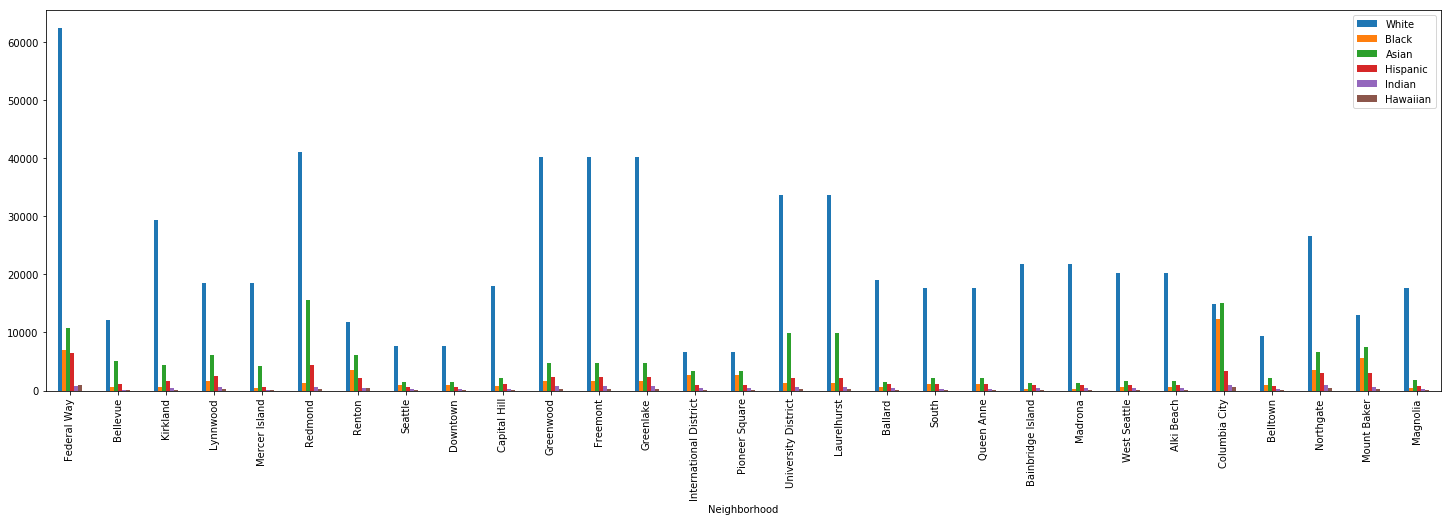

In [188]:
import matplotlib.pyplot as plt
new_seattle_population=new_seattle_population[['Neighborhood','White','Black','Asian','Hispanic','Indian','Hawaiian']]
new_seattle_population.set_index('Neighborhood',inplace=True,drop=True)

new_seattle_population.plot(kind='bar',figsize=(25,7))
plt.show()

In [190]:
#Source:https://www.greatschools.org
Seattle_school_ratings=pd.DataFrame({"Neighborhood":main_df["Neighborhood"],
                                      "Top School Rating":[8,9,9,8,10,10,7,10,0,0,0,0,7,0,0,0,6,0,0,6,10,5,5,9,4,0,0,3,0]})
                                     


In [191]:
#Seattle_school_ratings.sort_values(by='Top School Rating',ascending=False)
Seattle_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

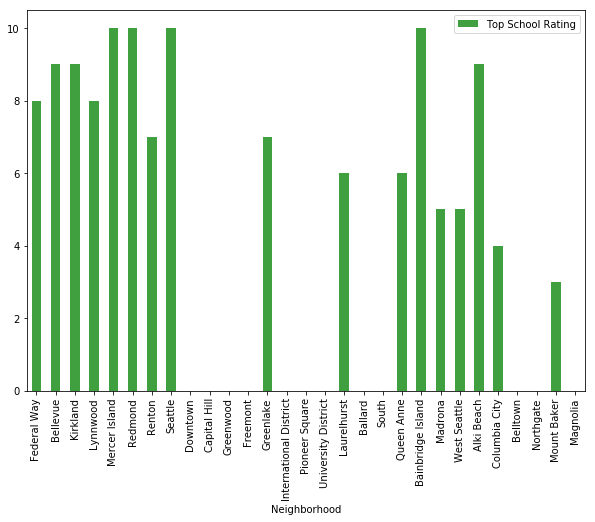

In [201]:

Seattle_school_ratings.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);


In [193]:
Seattle_Avg_HousingPrice=pd.DataFrame({"Neighborhood":main_df["Neighborhood"],
                                      "Average_Housing_Price":[172050.0,343500.0,297900.0,202000.0,
                                                               573900.0,279400.0,178000.0,275000.0,275000.0,477000.0,279200.0,279200.0,
                                                               279200.0,225000.0,225000.0,370500.0,370500.0,255400.0,433500.0,433500.0,
                                                               335000.0,335000.0,286600.0,286600.0,187300.0,175000.0,225900.0,219400.0,363400.0]})

In [196]:
Seattle_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

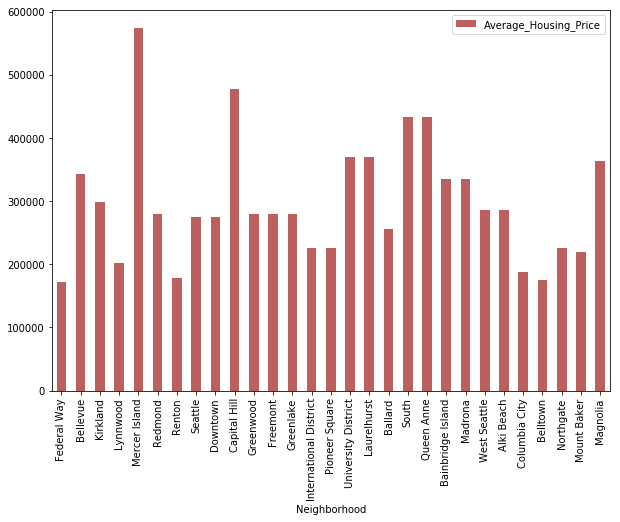

In [199]:
Seattle_Avg_HousingPrice.plot(kind='bar',figsize=(10,7),color='brown',alpha=0.75);

#### Now lets compare 2 neighborhoods to choose one that best matches our requirements as given below
     
    1. More Indian Population
    2. Higher School Rating
    3. Reasonable Housing Price in the Range of 300k to 500k
    4. Comfortable Neighborhoods
    
    


In [202]:
Nei1=input("Enter the Neighborhood: ")

Enter the Neighborhood: Bellevue


In [203]:
Nei2=input("Enter the Neighborhood: ")

Enter the Neighborhood: Kirkland


In [206]:
Venue_comparison=new_seattle.loc[[Nei1,Nei2]].T
Venue_comparison

Neighborhood,Bellevue,Kirkland
PostalCode,98005,98033
Latitude,47.615,47.6688
Longitude,-122.172,-122.192
Cluster Labels,2,0
1st Most Common Venue,Indian Restaurant,Café
2nd Most Common Venue,Vietnamese Restaurant,Baseball Field
3rd Most Common Venue,Bagel Shop,Music Venue
4th Most Common Venue,Automotive Shop,Sandwich Place
5th Most Common Venue,Mexican Restaurant,Asian Restaurant
6th Most Common Venue,Coffee Shop,Bus Stop


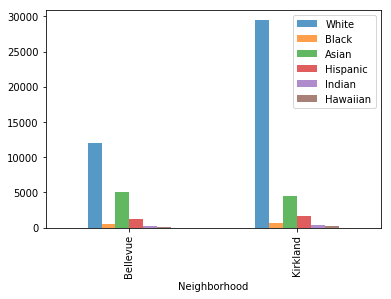

In [209]:
Population_Comparison=new_seattle_population.loc[[Nei1,Nei2]]
Population_Comparison.plot(kind='bar',alpha=0.75)

In [214]:
Population_Comparison['Indian']

Neighborhood
Bellevue    157
Kirkland    366
Name: Indian, dtype: int64

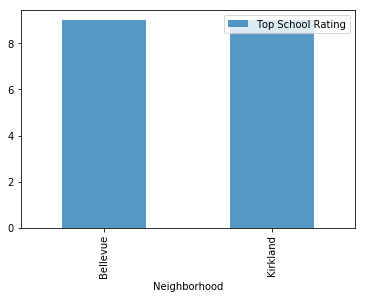

In [218]:
School_rating_comparison=Seattle_school_ratings.loc[[Nei1,Nei2]]
School_rating_comparison.plot(kind='bar',alpha=0.75);

In [219]:
School_rating_comparison

,Top School Rating
Neighborhood,
Bellevue,9
Kirkland,9


In [221]:
Avg_housing_price_comparison=Seattle_Avg_HousingPrice.loc[[Nei1,Nei2]]
Avg_housing_price_comparison

,Average_Housing_Price
Neighborhood,
Bellevue,343500.0
Kirkland,297900.0


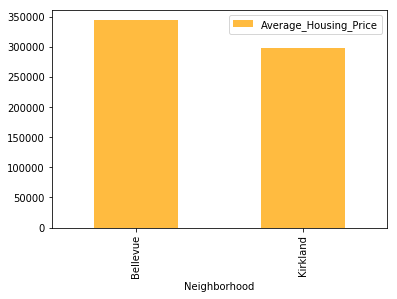

In [224]:
Avg_housing_price_comparison.plot(kind='bar',alpha=0.75,color='orange');

### Conclusion: 

This Analysis concludes that compared to Bellevue , Kirkland has the higher number of Indian population ,good school rating of 9 and a reasonable avg housing price of around 300k ,also top 10 common venues shows Kirkland has gotton a good neighborhood with Cafe,Restautrant,Sandwich Place,Baseball Field etc .Hence Kirkland wins over Bellevue!


Thank You!